In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
cd onedrive/desktop

C:\Users\ROSE S JOSE\onedrive\desktop


In [3]:
data=pd.read_csv('breast-cancer.data.csv',index_col=0)

In [4]:
print('columns containing missing values',data.isnull().any().sum())

columns containing missing values 0


In [5]:
data.head()

,class,age,menopause,tumour-size,inv-nodes,node caps,deg-malig,breast,breast-quad,irradient
ID,,,,,,,,,,
1,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
3,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
5,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 1 to 286
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumour-size    286 non-null object
inv-nodes      286 non-null object
node caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradient      286 non-null object
dtypes: int64(1), object(9)
memory usage: 14.5+ KB


In [7]:
 ms_dummies=pd.get_dummies(data['irradient'],prefix='irradient').iloc[:,1:]
data=pd.concat([data,ms_dummies],axis=1)

In [8]:
data.head()

,class,age,menopause,tumour-size,inv-nodes,node caps,deg-malig,breast,breast-quad,irradient,irradient_yes
ID,,,,,,,,,,,
1,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,0
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,0
3,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,0
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,0
5,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,0


In [15]:
data.drop('irradient',axis=1,inplace=True)

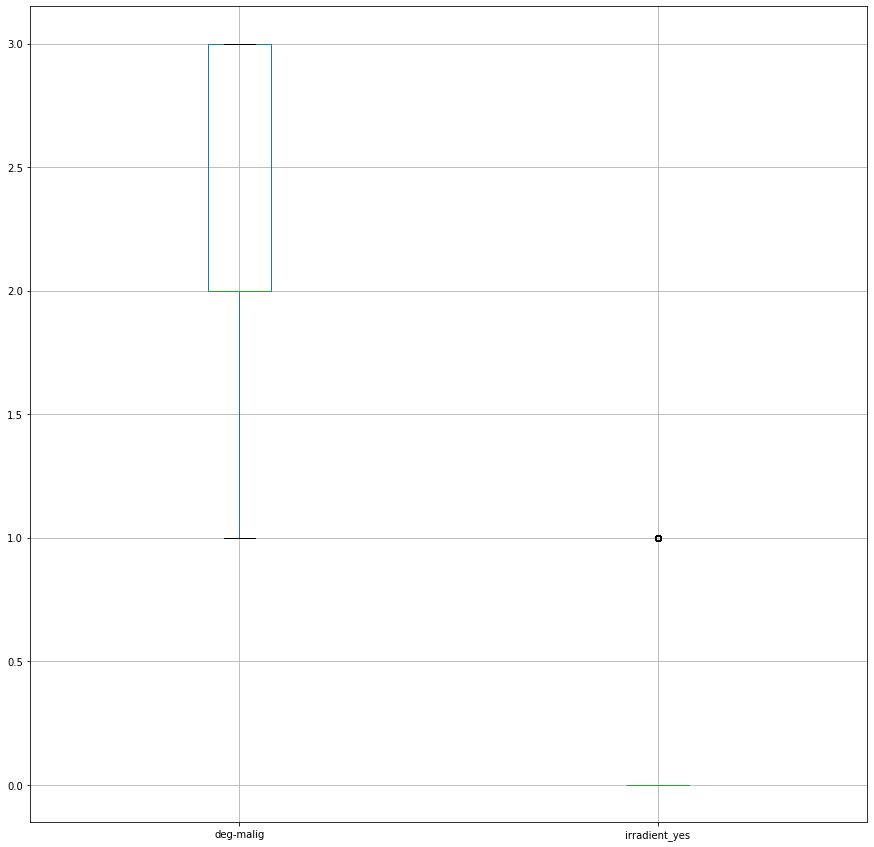

In [10]:
data.boxplot(figsize=(15,15))

In [11]:
for i in data.select_dtypes(include=[np.object]).columns:
    print(data.select_dtypes(include=[np.object])[i].value_counts())

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64
premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64
30-34     60
25-29     54
20-24     50
15-19     30
Oct-14    28
40-44     22
35-39     19
0-4        8
50-54      8
05-Sep     4
45-49      3
Name: tumour-size, dtype: int64
0-2       213
03-May     36
06-Aug     17
09-Nov     10
15-17       6
Dec-14      3
24-26       1
Name: inv-nodes, dtype: int64
no     222
yes     56
?        8
Name: node caps, dtype: int64
left     152
right    134
Name: breast, dtype: int64
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64
no     218
yes     68
Name: irradient, dtype: int64


In [12]:
data['class'] = data['class'].replace({'no-recurrence-events':0,'recurrence-events':1})
data['age'] = data['age'].replace({'50-59':0,'40-49':1,'60-69':2,'30-39':3,'70-79':4,'20-29':5})
data['menopause'] = data['menopause'].replace({'premeno':0,'ge40':1,'lt40':2})
data['tumour-size'] = data['tumour-size'].replace({'30-34':0,'25-29':1,'20-24':2,'15-19':3,'Oct-14':4,'40-44':5,'35-39':6,'0-4':7,'50-54':8,'05-Sep':9,'45-49':10})
data['inv-nodes'] = data['inv-nodes'].replace({'0-2':0,'03-May':1,'06-Aug':2,'09-Nov':3,'15-17':4,'Dec-14':5,'24-26':6})
data['node caps'] = data['node caps'].replace({'no':0,'yes':1,'?':2})
data['breast'] = data['breast'].replace({'left':0,'right':1})
data['breast-quad'] = data['breast-quad'].replace({'left_low':0,'left_up':1,'right_up':2,'right_low':3,'central':4,'?':5})

In [16]:
data.head()

,class,age,menopause,tumour-size,inv-nodes,node caps,deg-malig,breast,breast-quad,irradient_yes
ID,,,,,,,,,,
1,0,3,0,0,0,0,3,0,0,0
2,0,1,0,2,0,0,2,1,2,0
3,0,1,0,2,0,0,2,0,0,0
4,0,2,1,3,0,0,2,1,1,0
5,0,1,0,7,0,0,2,1,3,0


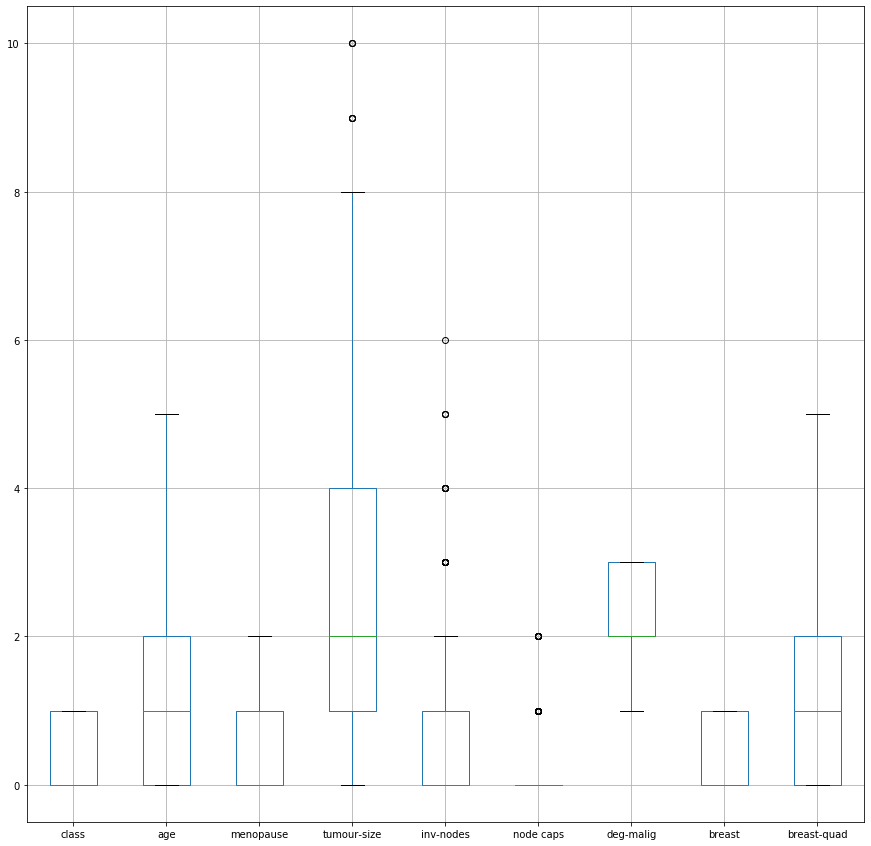

In [22]:
data.boxplot(figsize=(15,15))

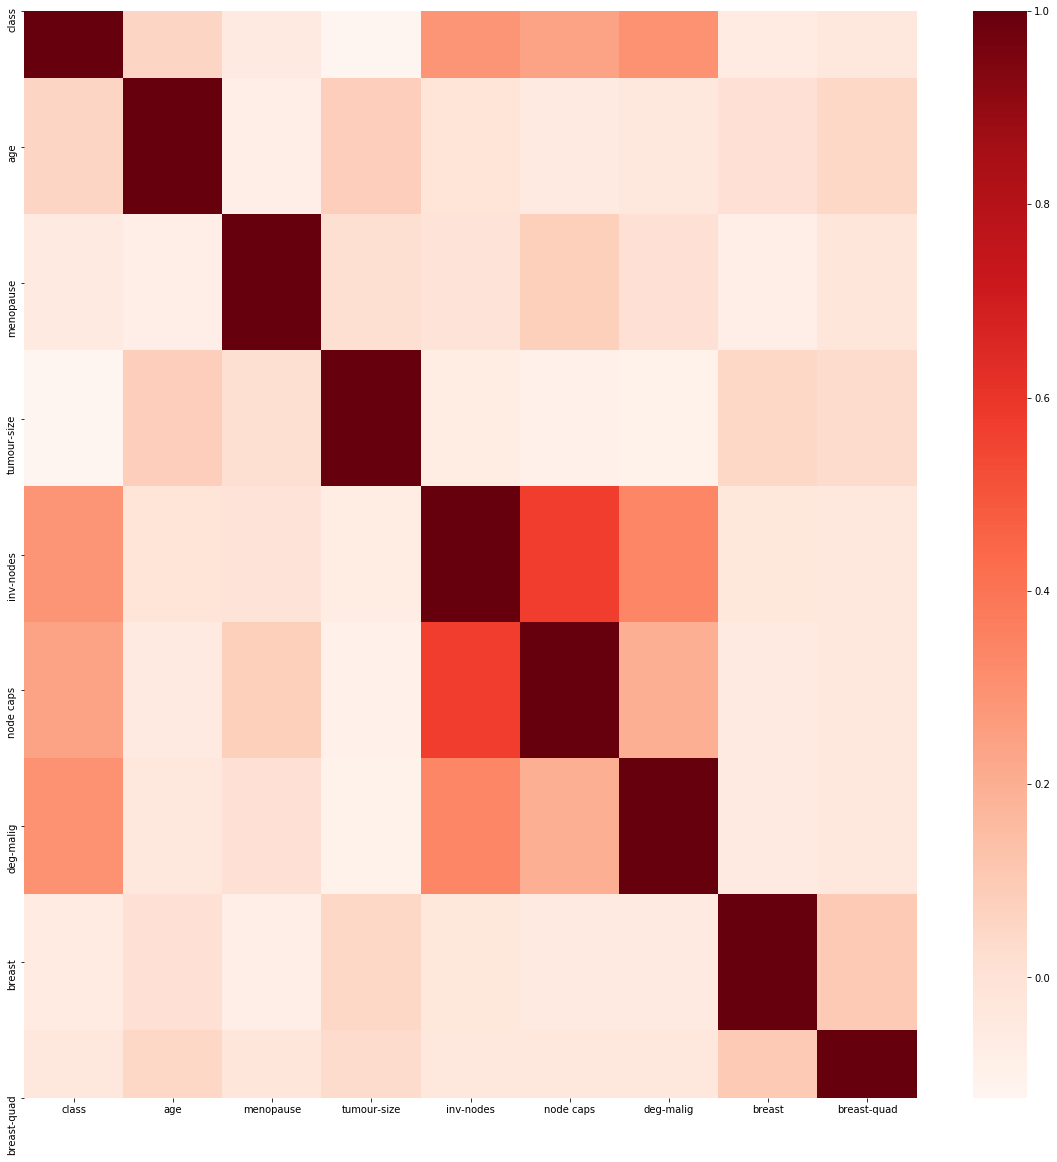

In [23]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), cmap='Reds')
plt.show()

In [17]:
y = data.loc[:,['irradient_yes']]

In [18]:
data.drop('irradient_yes',axis=1,inplace=True)

In [19]:
X = data.iloc[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape

(214, 8)

Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=20)
clf=classifier.fit(X_train, y_train)

In [25]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[49  1]
 [17  5]]


In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1], dtype=uint8)

In [27]:
clf.score(X_test,y_test)

0.75

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

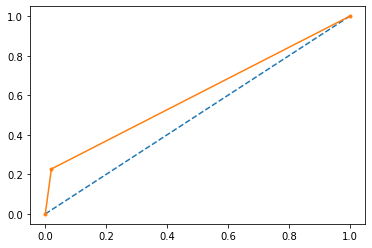

In [31]:
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

Decision Tree Classifier

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_predict = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6388888888888888

In [34]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
   
)

,0,1
0,39,11
1,15,7


In [35]:
from sklearn.preprocessing import scale
X = scale(X)

Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predict = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.7083333333333334

Gaussian Naive Bayes Classifier

In [40]:
rom sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.7777777777777778